In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Solução analítica

O número de jogos por dia é dado por 
$$
f(t) = 5.2 \times 10^6 \times 2^{\frac{t}{365}},
$$
onde $t$ é o número do dia. O número de bytes a serem armazenados por dia é
$$
g(t) = 50 \frac{\text{lances}}{\text{partida}}  \times 2 \frac{\text{bytes}}{\text{lance}} \times f(t) \frac{\text{partidas}}{\text{dia}}
= 5.2 \times 10^8 \times 2^{\frac{t}{365}}.
$$

O volume total a ser armazenado no acúmulo de $t$ dias é
$$
G(t) = \sum_{k = 0}^{t} g(t) = \sum_{k = 0}^{t} 5.2 \times 10^8 \times 2^{\frac{t}{365}} = \sum_{k = 0}^{t} 5.2 \times 10^8 \times \left(2^{\frac{1}{365}}\right)^t
$$
que é a soma de uma progressão geométrica de termo inicial $g(0) = 5.2 \times 10^8$ e razão $r = 2^{\frac{1}{365}}$.

Portanto, a fórmula fechada para $G(t)$ é 

$$
G(t) = \frac{g(t + 1) - g(0)}{r - 1} = 5.2 \times 10^8 \frac{2^{\frac{t + 1}{365}} - 1}{2^{\frac{1}{365}} - 1}
$$

Vamos ver o comportamento desta função:

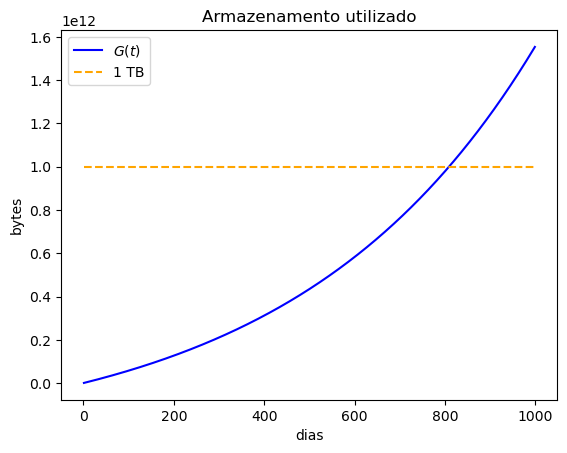

In [21]:
def G(t):
    return 5.2e8 * (2.0 ** ((t + 1.0) / 365.0) - 1.0) / (2.0 ** (1.0/365.0) - 1.0)

t = np.arange(1, 1000, 1)
y = G(t)
y_1TB = 1e12 * np.ones(t.shape)

plt.figure()
plt.plot(t, y, '-', color='blue', label='$G(t)$')
plt.plot(t, y_1TB, '--', color='orange', label='1 TB')

plt.title('Armazenamento utilizado')
plt.xlabel('dias')
plt.ylabel('bytes')
plt.legend()
plt.show()

Queremos saber qual o dia em que o espaço livre de $1 \text{TB}$ se esgotará. Aparentemente é em torno do dia 800. Vamos resolver a equação $G(t) = 10^{12}$. Isolando $t$ nesta equação:

$$
t = \frac{\log{\left(1 + \frac{10^{12}}{5.2 \times 10^8} \left( 2^{\frac{1}{365}} - 1 \right)\right)}}{\log{2^{\frac{1}{365}}}} - 1
$$

In [22]:
numerator = np.log(1 + (1e12/5.2e8) * (2 ** (1.0 / 365.0) - 1))
denominator = np.log(2 ** (1.0 / 365.0))
t = numerator/denominator - 1.0

print(t)
print(np.ceil(t))

808.906828633632
809.0


Logo, em $809$ dias o disco estoura, o que dá pouco mais de $2$ anos.

# Solução da boa preguiça

Soma em um *loop* com *break* quando estourar!

In [19]:
def g(t):
    return 50 * 2 * 5_200_000 * 2 ** (t / 365.0)


N = 10000

soma = 0
for t in range(N):
    soma += g(t)
    if soma > 1e12:
        break
        
        
print(t)
print(t / 365)

809
2.2164383561643834


Explique com suas palavras: porque o Spark é baseado em um paradigma de programação funcional?